# Milestone3


Please put this notebook in the same folder as the training data and unzip the train.json

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
import warnings 
import itertools
warnings.filterwarnings('ignore')

In [3]:
t = pd.read_json('train.json')

In [4]:
t.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [5]:
testing = pd.read_json('test.json')

In [6]:
testing.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7260,7174566,-74.0026,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7321,7191391,-74.0028,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street
5,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7054,7171695,-74.0095,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place


### Remove outliers

In [7]:
t = t[t['price'] <= np.percentile(t['price'], 99)]
t = t[t['price'] >= np.percentile(t['price'],1)]

In [8]:
t = t[t['latitude'] <= np.percentile(t['latitude'], 99)]
t = t[t['latitude'] >= np.percentile(t['latitude'],1)]

In [9]:
t = t[t['longitude'] <= np.percentile(t['longitude'], 99)]
t = t[t['longitude'] >= np.percentile(t['longitude'],1)]

In [10]:
def outputCSV(predLabel):
    labels2idx = {'high': 0, 'low': 1, 'medium': 2}
    sub = pd.DataFrame()
    sub["listing_id"] = testing["listing_id"]
    for label in ["high", "medium", "low"]:
        sub[label] = predLable[:, labels2idx[label]]
    sub.to_csv("submission_rf.csv", index=False)

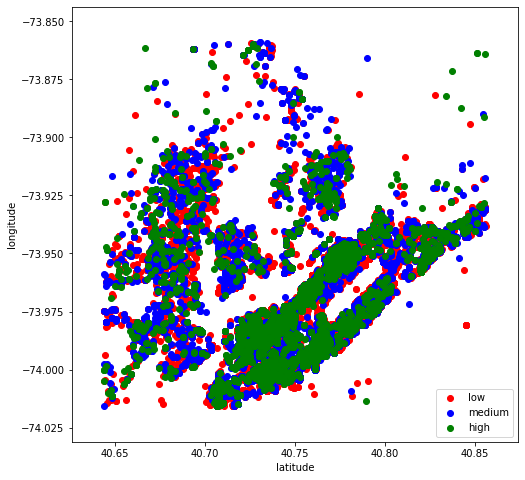

In [11]:
colors = itertools.cycle(["r", "b", "g"])
fig = plt.figure(figsize=(8,8))
for level in ['low', 'medium','high']:
    data = t[t['interest_level'] == level]
    lat = data['latitude']
    lon = data['longitude']
    plt.scatter(lat, lon, color=next(colors), label = level)
plt.legend()
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

### Features selection

#### 0.Naive features

In [12]:
featureSelect = ['bathrooms','bedrooms','latitude','longitude','price']

In [13]:
X_pred = testing[featureSelect]

In [14]:
X = t[featureSelect]

In [15]:
y = t['interest_level']

##### Random Forest

In [16]:
treeModel = RandomForestClassifier(n_estimators = 10, max_depth = 5, min_samples_leaf = 10)

In [17]:
scores = cross_val_score(treeModel,X, y, cv=10,scoring = 'neg_log_loss')

In [18]:
-scores.mean()

0.700886296573201

In [19]:
treeModel.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
y_pred = treeModel.predict_proba(X)

In [21]:
log_loss(y,y_pred)

0.6986671505199198

In [22]:
predLable = treeModel.predict_proba(X_pred)

In [23]:
outputCSV(predLable)

Random Forest log loss = 0.71116

##### Logistic Regression

In [39]:
logReg = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0,multi_class = 'auto',solver='sag')
)

In [40]:
scores = cross_val_score(logReg,X, y, cv=10,scoring = 'neg_log_loss')

In [41]:
-scores.mean()

0.7106723581500316

In [42]:
logReg.fit(X,y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=0, solver='sag',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [45]:
y_pred = logReg.predict_proba(X)

In [46]:
log_loss(y,y_pred)

0.7103561816292534

In [47]:
predLable = logReg.predict_proba(X_pred)

In [48]:
outputCSV(predLable)

logirstic regression log loss: 0.73383

##### SVM

In [15]:
svm = make_pipeline(
    StandardScaler(),
    PCA(2),
    SVC(kernel = 'sigmoid', C = 0.1, max_iter = 100, probability = True)
)
scores = cross_val_score(svm,X, y, cv=10,scoring = 'neg_log_loss')
-scores.mean()

0.7719167363867343

It has a warning that 'Solver terminated early (max_iter=100)'. Because SVM is slow so we can only set the max_iter = 100 to improve efficiency.

In [16]:
svm.fit(X, y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svc',
                 SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='sigmoid', max_iter=100,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [60]:
y_pred = svm.predict_proba(X)
log_loss(y,y_pred)

0.7719303259493612

In [62]:
predLable = svm.predict_proba(X_pred)
outputCSV(predLable)

svm log loss: 0.79225

#### 1.Tune parameters

##### Random Forest

In [24]:
n_range = [100,200,300,400,500,600]
cv_scores= []
for n in n_range:
    tree = RandomForestClassifier(n_estimators = n, max_depth = 5, min_samples_leaf = 10)
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(-scores.mean())

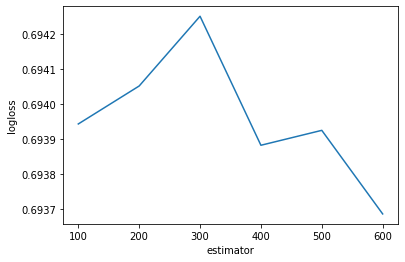

In [58]:
plt.plot(n_range,cv_scores)
plt.xlabel('estimator')
plt.ylabel('logloss')
plt.show()

In [49]:
bestScore = min(cv_scores)
bestIndex = -1
for index in range(6):
    if cv_scores[index] == bestScore:
        bestIndex = n_range[index]
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 600


In [50]:
treeModel = RandomForestClassifier(n_estimators = 600, max_depth = 5, min_samples_leaf = 10)

In [51]:
treeModel.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_pred = treeModel.predict_proba(X)

In [53]:
log_loss(y,y_pred)

0.6907783639998787

In [54]:
predLable = treeModel.predict_proba(X_pred)

In [55]:
outputCSV(predLable)

Random Forest log loss = 0.70499

##### Logistic regression

In [82]:
solvers_name = ['newton-cg', 'sag', 'saga', 'lbfgs']
cv_scores_log = []
for n in solvers_name:
    logReg1 = make_pipeline(
        StandardScaler(),
        LogisticRegression(random_state=0,multi_class = 'auto',solver=n)
    )
    scores = cross_val_score(logReg1,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores_log.append(-scores.mean())

In [77]:
cv_scores_log

[0.7106725884493647, 0.7106723581500316, 0.7106725738840746, 0.710672636707759]

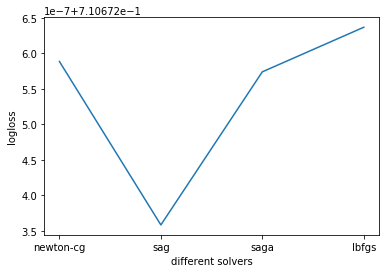

In [84]:
plt.plot(solvers_name, cv_scores_log)
plt.xlabel('different solvers')
plt.ylabel('logloss')
plt.show()

From the graph we can know the best solver is sag

Log loss score is still same: 0.73383

##### SVM

In [95]:
kernels_name = ['sigmoid', 'rbf', 'poly']
cv_scores_svm = []
gamma = [0.1, 0.5, 1]
for name in kernels_name:
    score_list = []
    for n in gamma:
        svm1 = make_pipeline(
            StandardScaler(),
            PCA(2),
            SVC(kernel = name, C = 0.1, max_iter = 100, gamma = n, probability = True)
        )
        scores = cross_val_score(svm1,X,y,cv=10,scoring = 'neg_log_loss')
        score_list.append(-scores.mean())
    cv_scores_svm.append(score_list)

In [97]:
cv_scores_svm

[[0.792897340207853, 0.7721457628848118, 0.7720326702511107],
 [0.7725724194017445, 0.7745187884789384, 0.7740582471828086],
 [0.7762593544522088, 0.7739128295395346, 0.7732214617559744]]

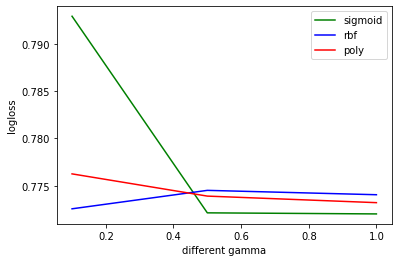

In [99]:
plt.plot(gamma, cv_scores_svm[0],'g',
         gamma, cv_scores_svm[1],'b',
         gamma, cv_scores_svm[2],'r'
         )
plt.xlabel('different gamma')
plt.ylabel('logloss')
plt.legend(kernels_name)
plt.show()

In [159]:
svm = make_pipeline(
    StandardScaler(),
    PCA(2),
    SVC(kernel = 'sigmoid', C = 0.1, max_iter = 100, gamma = 1, probability = True)
)

In [160]:
scores = cross_val_score(svm,X, y, cv=10,scoring = 'neg_log_loss')
-scores.mean()

0.772188661419605

In [161]:
svm.fit(X,y)
y_pred = svm.predict_proba(X)
log_loss(y,y_pred)

0.7733395563459318

In [162]:
predLable = svm.predict_proba(X_pred)
outputCSV(predLable)

svm log loss: 0.79256

#### 2.More features

In [36]:
def date_to_month(d):
    d=pd.to_datetime(d)
    return d

In [37]:
date = np.vectorize(date_to_month)

In [38]:
t['dateTime'] = date(t['created'])
testing['dateTime'] = date(testing['created'])

In [39]:
t['year'] = t['dateTime'].dt.year
t['month'] = t['dateTime'].dt.month
t['day'] = t['dateTime'].dt.day
t['hour'] = t['dateTime'].dt.hour
t['minute'] = t['dateTime'].dt.minute

testing['year'] = testing['dateTime'].dt.year
testing['month'] = testing['dateTime'].dt.month
testing['day'] = testing['dateTime'].dt.day
testing['hour'] = testing['dateTime'].dt.hour
testing['minute'] = testing['dateTime'].dt.minute

In [40]:
featureSelect = featureSelect + ['year','month','day','hour','minute']

In [41]:
X_pred = testing[featureSelect]
X = t[featureSelect]
y = t['interest_level']

##### Random Forest

In [56]:
n_range = [100,200,300,400,500,600]
cv_scores= []
for n in n_range:
    tree = RandomForestClassifier(n_estimators = n, max_depth = 5, min_samples_leaf = 10)
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(-scores.mean())

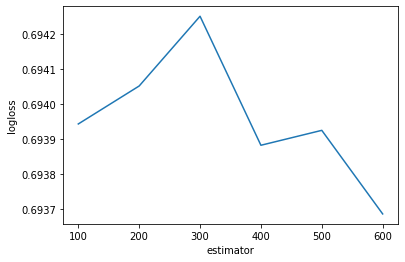

In [57]:
plt.plot(n_range,cv_scores)
plt.xlabel('estimator')
plt.ylabel('logloss')
plt.show()

In [59]:
bestScore = min(cv_scores)
bestIndex = -1
for index in range(6):
    if cv_scores[index] == bestScore:
        bestIndex = n_range[index]
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 600


In [99]:
treeModel = RandomForestClassifier(n_estimators = 600, max_depth = 5, min_samples_leaf = 1)

In [100]:
scores = cross_val_score(treeModel,X, y, cv=10,scoring = 'neg_log_loss')

In [101]:
-scores.mean()

0.7247427793737204

In [102]:
treeModel.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
y_pred = treeModel.predict_proba(X)
log_loss(y,y_pred)

0.7220020212271916

In [104]:
predLable = treeModel.predict_proba(X_pred)

In [105]:
outputCSV(predLable)

Funny thing: actually we use depth = 5 can achieve lower log loss compare with depth = 6 which is suggested by the cross validation.  
Random Forest logloss: 0.70465

##### Logistic regression

In [138]:
solvers_name = ['newton-cg', 'sag', 'saga', 'lbfgs']
cv_scores_log = []
for n in solvers_name:
    logReg1 = make_pipeline(
        StandardScaler(),
        LogisticRegression(random_state=0,multi_class = 'auto',solver=n)
    )
    scores = cross_val_score(logReg1,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores_log.append(-scores.mean())

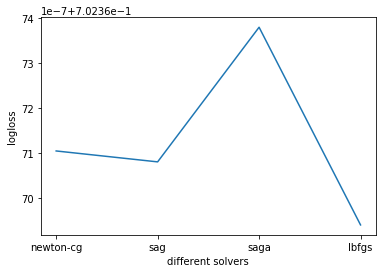

In [139]:
plt.plot(solvers_name, cv_scores_log)
plt.xlabel('different solvers')
plt.ylabel('logloss')
plt.show()

In [149]:
logReg1 = make_pipeline(
    MaxAbsScaler(),
    LogisticRegression(random_state=0,multi_class = 'auto',solver='lbfgs')
)
logReg1.fit(X,y)

Pipeline(memory=None,
         steps=[('maxabsscaler', MaxAbsScaler(copy=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=0,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [150]:
y_pred = logReg1.predict_proba(X)
log_loss(y,y_pred)

0.7110598145284388

In [151]:
predLable = logReg1.predict_proba(X_pred)
outputCSV(predLable)

Logistic regression log loss: 0.72474

##### SVM

In [152]:
kernels_name = ['sigmoid', 'rbf', 'poly']
cv_scores_svm = []
gamma = [0.1, 0.5, 1]
for name in kernels_name:
    score_list = []
    for n in gamma:
        svm1 = make_pipeline(
            StandardScaler(),
            PCA(2),
            SVC(kernel = name, C = 0.1, max_iter = 100, gamma = n, probability = True)
        )
        scores = cross_val_score(svm1,X,y,cv=10,scoring = 'neg_log_loss')
        score_list.append(-scores.mean())
    cv_scores_svm.append(score_list)

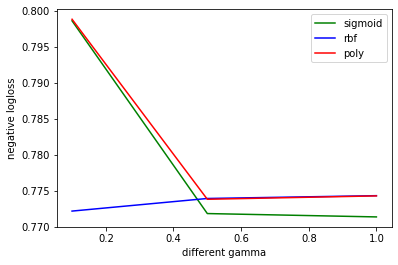

In [153]:
plt.plot(gamma, cv_scores_svm[0],'g',
         gamma, cv_scores_svm[1],'b',
         gamma, cv_scores_svm[2],'r'
         )
plt.xlabel('different gamma')
plt.ylabel('logloss')
plt.legend(kernels_name)
plt.show()

In [165]:
svm = make_pipeline(
    StandardScaler(),
    PCA(2),
    SVC(kernel = 'sigmoid', C = 0.1, max_iter = 100, gamma = 1, probability = True)
)

In [166]:
scores = cross_val_score(svm,X, y, cv=10,scoring = 'neg_log_loss')
-scores.mean()

0.7713185109083718

In [167]:
svm.fit(X,y)
y_pred = svm.predict_proba(X)
log_loss(y,y_pred)

0.771291828759373

In [168]:
predLable = svm.predict_proba(X_pred)
outputCSV(predLable)

svm log loss: 0.79062

#### 3.Add unstructured data

In [67]:
def list2str(list):
    return " ".join([i.replace(' ', '_') for i in list])

In [68]:
list2str = np.vectorize(list2str)

In [69]:
t['featuresStr'] = list2str(t['features'])
testing['featuresStr'] = list2str(testing['features'])

In [70]:
tf =  CountVectorizer(max_features=250, stop_words='english',max_df=0.6)
tr_sparse = tf.fit_transform(t["featuresStr"])
te_sparse = tf.transform(testing["featuresStr"])
X = sparse.hstack([t[featureSelect], tr_sparse])
X_pred = sparse.hstack([testing[featureSelect], te_sparse])

##### Random Forest

In [71]:
n_range = [400,500,600]
cv_scores= []
for n in n_range:
    tree = RandomForestClassifier(n_estimators = n, max_depth = 6, min_samples_leaf = 10)
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(-scores.mean())

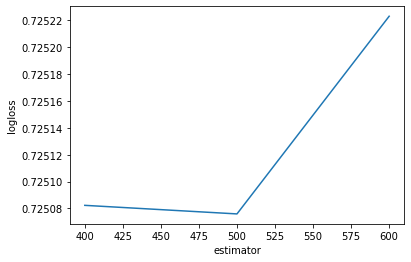

In [72]:
plt.plot(n_range,cv_scores)
plt.xlabel('estimator')
plt.ylabel('logloss')
plt.show()

In [73]:
bestScore = min(cv_scores)
bestIndex = -1
for index in range(3):
    if cv_scores[index] == bestScore:
        bestIndex = n_range[index]
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 500


In [93]:
treeModel = RandomForestClassifier(n_estimators = 500, max_depth = 6, min_samples_leaf = 1)

In [94]:
scores = cross_val_score(treeModel,X, y, cv=10,scoring = 'neg_log_loss')
-scores.mean()

0.7163449996870367

In [95]:
treeModel.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
y_pred = treeModel.predict_proba(X)
log_loss(y,y_pred)

0.7125967395440331

In [97]:
predLable = treeModel.predict_proba(X_pred)

In [98]:
outputCSV(predLable)

Random Forest log loss: 0.73247


##### Logistic regression

In [194]:
solvers_name = ['newton-cg', 'sag', 'saga', 'lbfgs']
cv_scores_log = []
for n in solvers_name:
    logReg1 = make_pipeline(
        MaxAbsScaler(),
        LogisticRegression(random_state=0,multi_class = 'auto',solver=n)
    )
    scores = cross_val_score(logReg1,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores_log.append(-scores.mean())

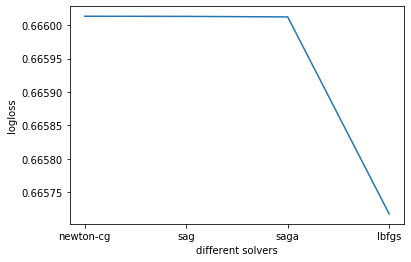

In [195]:
plt.plot(solvers_name, cv_scores_log)
plt.xlabel('different solvers')
plt.ylabel('logloss')
plt.show()

In [196]:
logReg1 = make_pipeline(
    MaxAbsScaler(),
    LogisticRegression(random_state=0,multi_class = 'auto',max_iter=1000,solver='lbfgs')
)
logReg1.fit(X,y)

Pipeline(memory=None,
         steps=[('maxabsscaler', MaxAbsScaler(copy=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=0,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

There is ConvergenceWarning only on lbfgs solver. So I increased the number of iterations 

In [197]:
y_pred = logReg1.predict_proba(X)
log_loss(y,y_pred)

0.6575882915537129

In [198]:
predLable = logReg1.predict_proba(X_pred)
outputCSV(predLable)

Logistic regression log loss: 0.68127

##### SVM

In [200]:
kernels_name = ['sigmoid', 'rbf', 'poly']
cv_scores_svm = []
gamma = [0.1, 0.5, 1]
for name in kernels_name:
    score_list = []
    for n in gamma:
        svm1 = make_pipeline(
            MaxAbsScaler(),
            SVC(kernel = name, C = 0.1, gamma = n, max_iter = 100, probability = True)
        )
        scores = cross_val_score(svm1,X,y,cv=10,scoring = 'neg_log_loss')
        score_list.append(-scores.mean())
    cv_scores_svm.append(score_list)

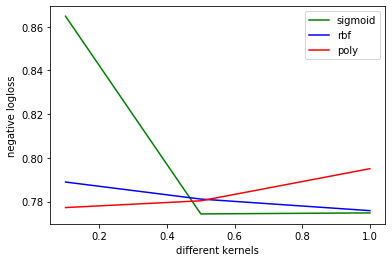

In [201]:
plt.plot(gamma, cv_scores_svm[0],'g',
         gamma, cv_scores_svm[1],'b',
         gamma, cv_scores_svm[2],'r'
         )
plt.xlabel('different kernels')
plt.ylabel('logloss')
plt.legend(kernels_name)
plt.show()

Warning: the code below takes a long time to train, comment out for safty.

In [231]:
# svm1 = make_pipeline(
#     MaxAbsScaler(),
#     SVC(kernel = 'sigmoid', C = 0.1, max_iter = -1, probability = True)
# )
# svm1.fit(X,y)


Pipeline(memory=None,
         steps=[('maxabsscaler', MaxAbsScaler(copy=True)),
                ('truncatedsvd',
                 TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
                              random_state=None, tol=0.0)),
                ('svc',
                 SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='sigmoid', max_iter=10000,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [221]:
y_pred = svm1.predict_proba(X)
log_loss(y,y_pred)

0.7726384936669168

In [232]:
predLable = svm1.predict_proba(X_pred)
outputCSV(predLable)

svm log loss: 0.77147

#### Question 8  
We use "Accuracy" as our evaluation metric

In [89]:
k_range = range(1,15)
cv_scores = []
for n in k_range:
    tree =  DecisionTreeClassifier(max_depth = n)   
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'accuracy')  
    cv_scores.append(scores.mean())

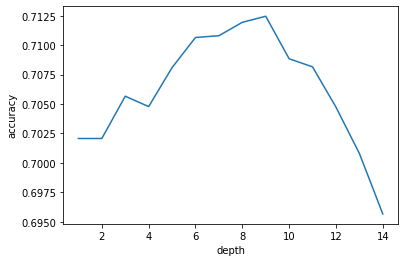

In [90]:
plt.plot(k_range,cv_scores)
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.show()

In [93]:
bestScore = max(cv_scores)
bestIndex = -1
for index in range(1,15):
    if cv_scores[index - 1] == bestScore:
        bestIndex = index
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 9


In [103]:
treeModel = DecisionTreeClassifier(max_depth = 9)

In [95]:
scores = cross_val_score(treeModel,X, y, cv=10,scoring = 'accuracy')
scores.mean()

0.7124942551414489

In [104]:
treeModel.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [105]:
treeModel.score(X,y)

0.7434750827707787

In [97]:
predLable = treeModel.predict_proba(X_pred)

In [98]:
outputCSV(predLable)

Decision tree with ACCURACY, logloss: 1.02166